## What is in the notebook:

This notebook gathers together state maternal mortality data, health-insurance data, and income data for states between 2010-2019. It also gathers together various natility data from 2010-2019.

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import copy

### Loading Data

#### CDC Maternal mortality data

In [59]:
maternal_mortality_df = pd.read_csv("../data/cdc_data/all_states_all_codes_by_year.csv")
maternal_mortality_df = maternal_mortality_df[["State", "Year", "Deaths", "Population"]]
print(maternal_mortality_df[maternal_mortality_df.Year>=1995])

              State  Year  Deaths  Population
0           Alabama  1999      10     1801848
1           Alabama  2005      12     1856905
2           Alabama  2006      10     1880993
3           Alabama  2015      12     1929191
4           Alabama  2016      35     1920571
...             ...   ...     ...         ...
1197        Vermont  1995       0      300279
1198        Vermont  1996       0      303034
1199        Vermont  1997       0      304893
1220     Washington  1995       0     2757505
1231  West Virginia  1995       0      941762

[631 rows x 4 columns]


#### ACS Income Data

This data frame needs to be pivoted.

In [48]:
income_df = pd.read_csv("../data/acs_income_by_year/all_income_from_2010_to_2023.csv")
income_df = income_df[income_df.columns[1:]]
income_df_pivot = pd.pivot(data = income_df,  index ='Year', columns= 'label')
income_df = income_df_pivot.stack(level=0)
income_df.reset_index(inplace=True)
income_df.rename(columns = {"level_1" : "State"},inplace= True)
income_df.head()


label,Year,State,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","Less than $10,000",Total
0,2010,Alabama,291136,462295,568262,155190,110550,515050,683128,805464,487371,418610,4499250
1,2010,Alaska,24791,122561,46620,45879,36225,52474,73631,121399,89373,23792,637189
2,2010,Arizona,301174,694479,620656,213517,196895,663570,884336,1119302,695469,414482,5802329
3,2010,Arkansas,186755,243784,379359,68553,56348,371449,442926,508686,289906,236611,2784750
4,2010,California,1486323,4692266,2969203,2048096,2047855,2756878,3942244,5360641,3913537,1690857,30895516


Here we aggregate the income data. Change the boolean ```Agg_Income``` to ```False``` if you do not want to aggregate income.

In [49]:
Agg_Income = True
if Agg_Income:
    income_df['sub_75k_income'] = (income_df["Less than $10,000"]+income_df["$10,000 to $14,999"]+income_df["$15,000 to $24,999"]+income_df["$25,000 to $34,999"]+income_df["$35,000 to $49,999"]+income_df["$50,000 to $74,999"])/income_df['Total']
    income_df['between_75k_150k_income'] = (income_df['$75,000 to $99,999']+income_df["$100,000 to $149,999"])/income_df['Total']
    income_df['above_150k_income'] = (income_df['$150,000 to $199,999']+income_df['$200,000 or more'])/income_df['Total']
    income_df = income_df[["State","Year","sub_75k_income",  'between_75k_150k_income',"above_150k_income","Total"]]


In [50]:
income_df

label,State,Year,sub_75k_income,between_75k_150k_income,above_150k_income,Total
0,Alabama,2010,0.729377,0.211072,0.059063,4499250
1,Alaska,2010,0.537842,0.332608,0.128853,637189
2,Arizona,2010,0.689985,0.239550,0.070732,5802329
3,Arkansas,2010,0.763367,0.191647,0.044852,2784750
4,California,2010,0.589281,0.278545,0.132574,30895516
...,...,...,...,...,...,...
671,Virginia,2023,0.389497,0.312093,0.299014,8471157
672,Washington,2023,0.368568,0.325822,0.305907,7713747
673,West Virginia,2023,0.592548,0.285819,0.121595,1823965
674,Wisconsin,2023,0.464156,0.343062,0.192617,6160812


#### Natality Data

In [42]:
natility_df = pd.read_csv("../data_manipulation/StateNatalityDF.csv")
natility_df.head()

,State,Year,Births,ChronicHypertensionBirths,DiabetesBirths,EnclampsiaBirths,Pregnancy-AssociatedHypertensionBirths,TobaccoUseBirths,HospitalBirths,BirthCenterBirths,...,NotReportedInitialCare,Under20Weeks,20-27Weeks,28-31Weeks,32-35Weeks,36Weeks,37-39Weeks,40Weeks,41Weeks,42PlusWeeks
0,Arizona,2010,87477,769.0,3694.0,769.0,3441.0,0.0,86346.0,437,...,87477.0,42.0,465,667.0,3579,3697.0,55528,18468,4671.0,337
1,Arizona,2011,85543,711.0,4014.0,772.0,3599.0,0.0,84380.0,454,...,85543.0,41.0,546,618.0,3421,3354.0,54646,18076,4482.0,321
2,Arizona,2012,86441,807.0,4452.0,634.0,3903.0,0.0,85177.0,505,...,86441.0,54.0,480,688.0,3476,3290.0,55425,18265,4441.0,271
3,Arizona,2013,85600,956.0,4919.0,604.0,4791.0,0.0,84450.0,459,...,85600.0,49.0,437,641.0,3430,3218.0,54667,18067,4787.0,261
4,Arizona,2014,86887,1039.0,6126.0,341.0,4567.0,4675.0,85628.0,511,...,0.0,35.0,474,664.0,3440,3206.0,55382,17920,5388.0,290


#### Behavioral Data
The data points here are included as percents and we have the total female population. We'll scale the data to get absolute values as well.

In [53]:
with open('../data/behavioral_data/data/all_states_behavior_data.pkl', 'rb') as file:
    behavior_df = pickle.load(file)
behavior_df.head()
behavior_df = behavior_df[["Year", "State", "Female_Population"	,"Percent_Overweight"	,"Percent_Obese",	"Percent_Overweight_or_Obese"	,"Percent_No_Activity"]]
behavior_df.head()
#for c in behavior_df.columns:
#    if "Percent" in c:
#        s = c.replace("Percent","Absolute")
#        behavior_df[s] = behavior_df[c]/100*behavior_df.Female_Population
#behavior_df.head()

,Year,State,Female_Population,Percent_Overweight,Percent_Obese,Percent_Overweight_or_Obese,Percent_No_Activity
0,2011,Alaska,349802,31.3,26.7,58.0,24.0
1,2012,Alaska,350355,32.8,25.4,58.2,20.1
2,2013,Alaska,350355,31.2,27.5,58.7,21.7
3,2014,Alaska,351150,29.4,30.2,59.6,20.3
4,2015,Alaska,349737,30.9,30.5,61.4,23.2


#### Merging Data Sets (No Scaling)

Here we merge the data sets. Since this is dealing with absolute numbers, I'ved dropped the "Percent" columns in the ```behavior_df``` dataframe.
The natality data is currently commented out. To include that uncomment.


In [63]:
merged_df = pd.merge(left = maternal_mortality_df, right = income_df, on = ["Year","State"], how = 'inner')
print(f"Maternal mortality and income data frame has size {merged_df.shape}.")
merged_df = pd.merge(left = merged_df, right = behavior_df, on = ["Year","State"], how = 'inner')
#merged_df = pd.merge(left = merged_df, right = behavior_df[[c for c in behavior_df.columns if not "Percent" in c]], on =["Year", "State"], how = 'inner' )
#print(f'Maternal mortality, income, and behavioral data frame has size {merged_df.shape}')
#merged_df = pd.merge(left = merged_df, right = natility_df, on = ["Year", "State"], how = 'inner')
#print(f"Maternal mortality, income, behavioral, and natality data frame has size {merged_df.shape}.")
merged_df.head()


Maternal mortality and income data frame has size (293, 8).


,State,Year,Deaths,Population,sub_75k_income,between_75k_150k_income,above_150k_income,Total,Female_Population,Percent_Overweight,Percent_Obese,Percent_Overweight_or_Obese,Percent_No_Activity
0,Alabama,2015,12,1929191,0.686370,0.236021,0.077923,4556454,2506169,28.4,36.4,64.8,33.7
1,Alabama,2016,35,1920571,0.667801,0.248429,0.083766,4569366,2507248,29.5,35.2,64.7,32.9
2,Alabama,2017,41,1916967,0.654459,0.259141,0.086585,4540304,2514851,30.2,37.4,67.6,35.8
3,Alabama,2018,31,1913546,0.637414,0.265862,0.096720,4589595,2518600,29.6,37.8,67.4,33.8
4,Alabama,2019,35,1910340,0.623672,0.269287,0.106755,4687202,2533574,30.1,36.2,66.3,34.3


/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_45490/4216563951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MergeDF_Corr = merged_df[merged_df.columns[3:]].corr(method = 'pearson')


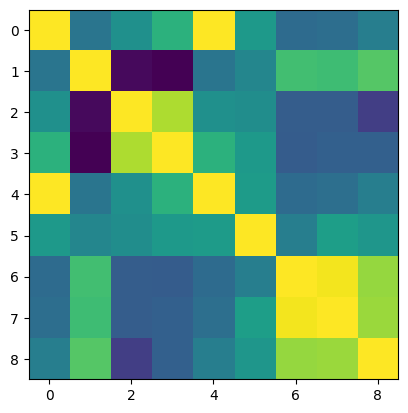

In [64]:
MergeDF_Corr = merged_df[merged_df.columns[3:]].corr(method = 'pearson')
plt.imshow(MergeDF_Corr)

In [66]:
merged_df.sort_values("Deaths",ascending= False, inplace = True)
print(merged_df.Deaths.head(20))

226    167
225    159
228    157
229    153
230    147
227    147
224    130
54     104
55      98
231     94
29      91
30      89
232     89
27      88
28      84
44      83
53      82
25      81
31      81
26      77
Name: Deaths, dtype: int64


#### Merged Data for Scaled Data
```merged_df[Death_Rate]``` will be $\displaystyle \frac{\# \textup{Maternal Deaths}}{\textup{Female Population}} \times 1,000,000.$


The income categories are scaled by the ```Total``` index which is the total population of the state.

This doesn't inlcude any ```natality_df``` dataframe information, but that can be incorporated easily. I  just don't know that data as well.

In [28]:
scale_income = copy.copy(income_df)
for c in scale_income.columns:
    if not c in ["State","Year","Total"]:
        scale_income[c] = scale_income[c]/scale_income.Total
scale_income = scale_income[scale_income.columns[:-1]]

merged_df = pd.merge(left = maternal_mortality_df, right = scale_income, on = ["Year","State"], how = 'inner')
print(f"Maternal mortality and income data frame has size {merged_df.shape}.")
merged_df = pd.merge(left = merged_df, right = behavior_df[[c for c in behavior_df.columns if not "Absolute" in c]], on =["Year", "State"], how = 'inner' )
print(f'Maternal mortality, income, and behavioral data frame has size {merged_df.shape}')
merged_df["Death_Rate"] = merged_df.Deaths/merged_df.Female_Population*(10**6)

### Change Column Order
all_column_list = list(merged_df.columns)
all_column_list.remove("Female_Population")
all_column_list.remove("Deaths")
all_column_list.remove("Population")
column_list = ["State","Year", "Death_Rate"]
for c in column_list:
    all_column_list.remove(c)
column_list.extend(all_column_list)

merged_df = merged_df[column_list]



Maternal mortality and income data frame has size (293, 14).
Maternal mortality, income, and behavioral data frame has size (268, 19)


In [32]:
merged_df

,State,Year,Death_Rate,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","Less than $10,000",Percent_Overweight,Percent_Obese,Percent_Overweight_or_Obese,Percent_No_Activity
0,Alabama,2015,4.788185,0.059625,0.118348,0.114820,0.041665,0.036258,0.107402,0.135860,0.186356,0.117673,0.082307,28.4,36.4,64.8,33.7
1,Alabama,2016,13.959529,0.055991,0.123604,0.110965,0.045367,0.038399,0.104778,0.133782,0.180085,0.124824,0.082200,29.5,35.2,64.7,32.9
2,Alabama,2017,16.303153,0.056510,0.136780,0.109328,0.044676,0.041909,0.099199,0.133345,0.181970,0.122361,0.074107,30.2,37.4,67.6,35.8
3,Alabama,2018,12.308425,0.051633,0.135831,0.106771,0.050791,0.045928,0.095286,0.127788,0.177753,0.130032,0.078184,29.6,37.8,67.4,33.8
4,Alabama,2019,13.814477,0.047419,0.148787,0.098287,0.056919,0.049837,0.096868,0.130157,0.181190,0.120500,0.069751,30.1,36.2,66.3,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Wisconsin,2015,3.789131,0.040680,0.151504,0.090028,0.047524,0.041856,0.095773,0.134101,0.201535,0.150213,0.047291,28.7,30.1,58.8,21.4
264,Wisconsin,2016,5.162111,0.040705,0.158440,0.087328,0.051854,0.046409,0.091427,0.132511,0.194874,0.148824,0.047177,30.0,29.9,59.9,21.7
265,Wisconsin,2017,4.116597,0.039574,0.164376,0.084735,0.060355,0.050217,0.086657,0.132691,0.190026,0.148034,0.043287,28.3,31.6,59.9,22.8
266,Wisconsin,2019,4.43742,0.034429,0.184085,0.074004,0.069358,0.059291,0.079449,0.122774,0.189261,0.149098,0.038193,28.4,35.5,63.9,25.6


/var/folders/cd/7clcx1wj4j9b99700gsd661h0000gn/T/ipykernel_45490/4033558773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MergeDF_Corr = merged_df[merged_df.columns[2:]].corr(method = 'pearson')


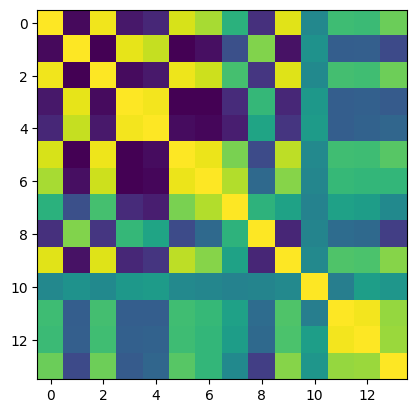

In [37]:
MergeDF_Corr = merged_df[merged_df.columns[2:]].corr(method = 'pearson')
plt.imshow(MergeDF_Corr)


In [38]:
MergeDF_Corr

,"$10,000 to $14,999","$100,000 to $149,999","$15,000 to $24,999","$150,000 to $199,999","$200,000 or more","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","Less than $10,000",Percent_Overweight,Percent_Obese,Percent_Overweight_or_Obese,Percent_No_Activity
"$10,000 to $14,999",1.000000,-0.923994,0.957828,-0.839748,-0.750944,0.878004,0.745411,0.290623,-0.696817,0.914014,-0.046997,0.388938,0.375999,0.557786
"$100,000 to $149,999",-0.923994,1.000000,-0.970333,0.927057,0.828334,-0.966755,-0.890977,-0.490697,0.625002,-0.872575,0.033950,-0.384873,-0.375347,-0.531276
"$15,000 to $24,999",0.957828,-0.970333,1.000000,-0.912677,-0.835108,0.953147,0.848459,0.418943,-0.655986,0.905047,-0.036870,0.408871,0.398541,0.562426
"$150,000 to $199,999",-0.839748,0.927057,-0.912677,1.000000,0.963881,-0.964327,-0.965676,-0.730616,0.343300,-0.749500,0.076885,-0.384818,-0.364084,-0.403863
"$200,000 or more",-0.750944,0.828334,-0.835108,0.963881,1.000000,-0.905664,-0.939499,-0.804600,0.179368,-0.663562,0.109844,-0.383287,-0.353952,-0.323118
"$25,000 to $34,999",0.878004,-0.966755,0.953147,-0.964327,-0.905664,1.000000,0.943210,0.601257,-0.516416,0.804795,-0.040939,0.398201,0.386828,0.488115
"$35,000 to $49,999",0.745411,-0.890977,0.848459,-0.965676,-0.939499,0.943210,1.000000,0.775168,-0.299512,0.645724,-0.065146,0.349498,0.331890,0.331476
"$50,000 to $74,999",0.290623,-0.490697,0.418943,-0.730616,-0.804600,0.601257,0.775168,1.000000,0.299630,0.161571,-0.098891,0.153724,0.127644,-0.034677
"$75,000 to $99,999",-0.696817,0.625002,-0.655986,0.343300,0.179368,-0.516416,-0.299512,0.299630,1.000000,-0.757747,-0.085207,-0.273446,-0.295217,-0.604090
"Less than $10,000",0.914014,-0.872575,0.905047,-0.749500,-0.663562,0.804795,0.645724,0.161571,-0.757747,1.000000,-0.043450,0.454562,0.442437,0.642579


In [40]:
merged_df.sort_values("Death_Rate",ascending= False, inplace = True)
print(merged_df.Death_Rate.head(20))

96     23.433061
54      20.09505
93     19.974458
55     18.704425
95     18.453086
97     17.121586
94     16.823971
2      16.303153
53     16.177105
18     15.235915
22     14.962804
74      14.85568
134    14.274665
1      13.959529
4      13.814477
57     13.809428
56     13.793831
73     13.663673
69     12.989006
88     12.848004
Name: Death_Rate, dtype: object
